In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

PATH = os.path.abspath(r'C:\Projects\Netology\Netology41\names')

In [2]:
# Task one
# Построить график изменения количества имен Ruth и Robert с 1900 по 2000
def names_dynamics(names, years): # both arg are lists
    names_by_year = {}
    for year in years:
        names_by_year[year]=pd.read_csv(PATH+'\\yob{}.txt'.format(year), names=['Names', 'Gender', 'Count'])
    names_all = pd.concat(names_by_year, names =['Year', 'Pos'])
    query_string = "Names=="+str(names)
    dynamics =  names_all.groupby((names_all.index.get_level_values(0),'Names')).sum().query(query_string).unstack('Names')
    dynamics.plot()    

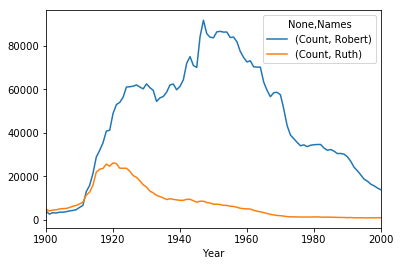

In [3]:
names_dynamics(['Ruth', 'Robert'], range(1900, 2001))

In [4]:
#Task two
#Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000)
def names_dynamics_bar(names, years): # both arg are lists
    names_by_year = {}
    for year in years:
        names_by_year[year]=pd.read_csv(PATH+'\\yob{}.txt'.format(year), names=['Names', 'Gender', 'Count'])
    names_all = pd.concat(names_by_year, names =['Year', 'Pos'])
    query_string = "Names=="+str(names)
    dynamics =  names_all.groupby((names_all.index.get_level_values(0),'Names')).sum().query(query_string).unstack('Names')
    dynamics.plot.bar()

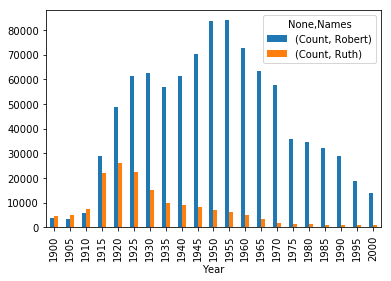

In [5]:
names_dynamics_bar(['Ruth', 'Robert'], range(1900, 2001, 5))

In [6]:
#Task three
#Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
def names_dynamics_pie(year, letter, count):
    col_names = ['Names', 'Gender', 'Count']
    pattern = re.compile ('^'+ letter)
    names_pattern = pd.DataFrame(columns=col_names)
    names = pd.read_csv(PATH+"\\yob{}.txt".format(year), names=col_names)
    for idx, el in names['Names'].iteritems():
        if pattern.match(el) is not None:
            names_pattern = pd.concat([names[names['Names'] == el], names_pattern])
    names_pattern.groupby('Names').sum().sort_values(by='Count', ascending=False).head(count).plot.pie(y='Count') 

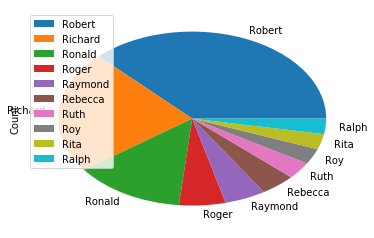

In [7]:
names_dynamics_pie(1950, 'R', 10)

In [8]:
#Task four
#Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. 
#Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество
#согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

def consonants_dynamics (years):
    names_by_year = {}
    for year in years:
        names_by_year[year] = pd.read_csv(PATH+"\\yob{}.txt".format(year), names =['Names', 'Gender', 'Count'])
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    dynamics = names_all.groupby('Names', as_index=False).sum().sort_values(by='Count', ascending=False)
    pattern = 'A|E|I|O|U|a|e|i|o|u'
    dynamics['Consonants'] = dynamics['Names'].str.len() - dynamics['Names'].str.count(pattern)
    dynamics.plot.scatter(x='Consonants', y='Count')
    plt.xlabel('Количество согласных букв в имени')
    plt.ylabel('Количество употреблений')

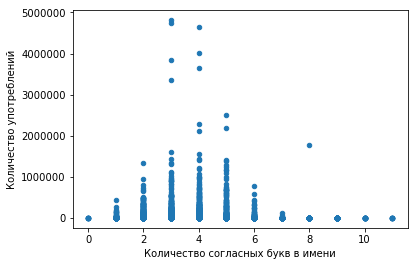

In [9]:
consonants_dynamics(i for i in range (1900, 2001, 1))
